# Results
In this notebook we present some of the results obtained after training the model. These include visualisation of convolutional kernels, feature maps...

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../../..')

In [9]:
# Libraries
import copy
from os.path import join
from os import environ
import h5py
import cv2

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from pyphoon.visualise import nice_imshow, make_mosaic
from pyphoon.io.h5 import read_source_image, read_source_images
from pyphoon.app.preprocess import MeanImagePreprocessor
from pyphoon.app.explore import get_activations, get_attribution_image

In [10]:
environ["CUDA_VISIBLE_DEVICES"]="1"

## 1. Load model

So, in this notebook we will explore some of the results obtained from the trained model.

In [11]:
# Load model
from predict import get_model
model = get_model()
model.load_weights('../weights.hdf5') # Replace

You can have an overview of the model by using `model.summary()`

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 8)       72        
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 8)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 254, 254, 8)       32        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 16)      1152      
_________________________________________________________________
activation_2 (Activation)    (None, 125, 125, 16)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 125, 16)      64        
__________

## 1. Visualize weights
Let us visualize the weights of the model. We only focus on the first layer's weights, since the rest is too abstract. We begin by actually obtaining the weights from `model`.

In [13]:
# Get all weights
weights = {}
for layer in model.layers:
    weights[layer.name] = layer.get_weights()

Below, we obtain the weights of the first convolutional layer, i.e. *conv2d_1*.

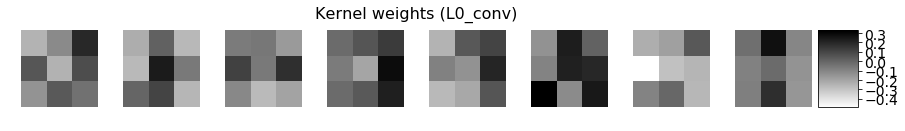

In [15]:
from pyphoon.app.explore import good_shape_conv_weights
W = good_shape_conv_weights(weights['conv2d_1'])
plt.figure(figsize=(15, 15))
plt.title('Kernel weights (L0_conv)', fontsize=16, y=1.08)
plt.axis('off')
nice_imshow(plt.gca(), make_mosaic(W[:,:,:,0], 1, 8), cmap=cm.binary, colorbar=True, barsize=14)
#plt.savefig('../_assets/weights_tcxtc.eps', format='eps')

**Note**: To save the figures uncomment the `plt.savefig` commands and replace the path. 

## 2. Network activations
An artificial neural network may be regarded as a black box. To mitigate this feeling, in this section we look at the activation maps throughout the different network layers for a particular input image. We will use images from sequence `200003` (training set), which includes TC and xTC samples.

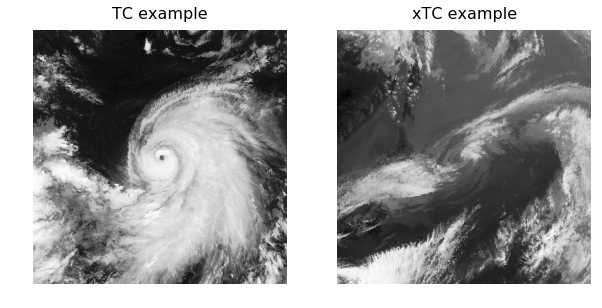

In [13]:
dataset_dir = '/root/fs9/grishin/database/uintimages/original/200003/'
X_tc = read_source_image(join(dataset_dir, '2000070507-200003-GMS5-1.h5'))
X_xtc = read_source_image(join(dataset_dir, '2000070907-200003-GMS5-1.h5'))

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(X_tc, 'Greys')
plt.axis('off')
plt.title('TC example', fontsize=16, y=1.02)
plt.subplot(1,2,2)
plt.imshow(X_xtc, 'Greys')
plt.axis('off')
plt.title('xTC example', fontsize=16, y=1.02)
plt.show()

Next, we preprocess the sample examples to have the shape we want them to have

In [14]:
# Define preprocessor
with h5py.File('../preprocessing_year.h5') as f:
    mean = cv2.resize(f.get('image_mean').value, (256, 256))
    scale_factor = f.get('max_value').value - f.get('min_value').value
preprocessor = MeanImagePreprocessor(mean, scale_factor, add_axis=[3, 0], resize_factor=(256, 256))

X_tc = preprocessor.apply(X_tc)
X_xtc = preprocessor.apply(X_xtc)

### 2.1 Convolutional Layers
Let us commence with the visualisation of the feature maps in the first three layers, which are convolutional.

#### TC

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:388: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


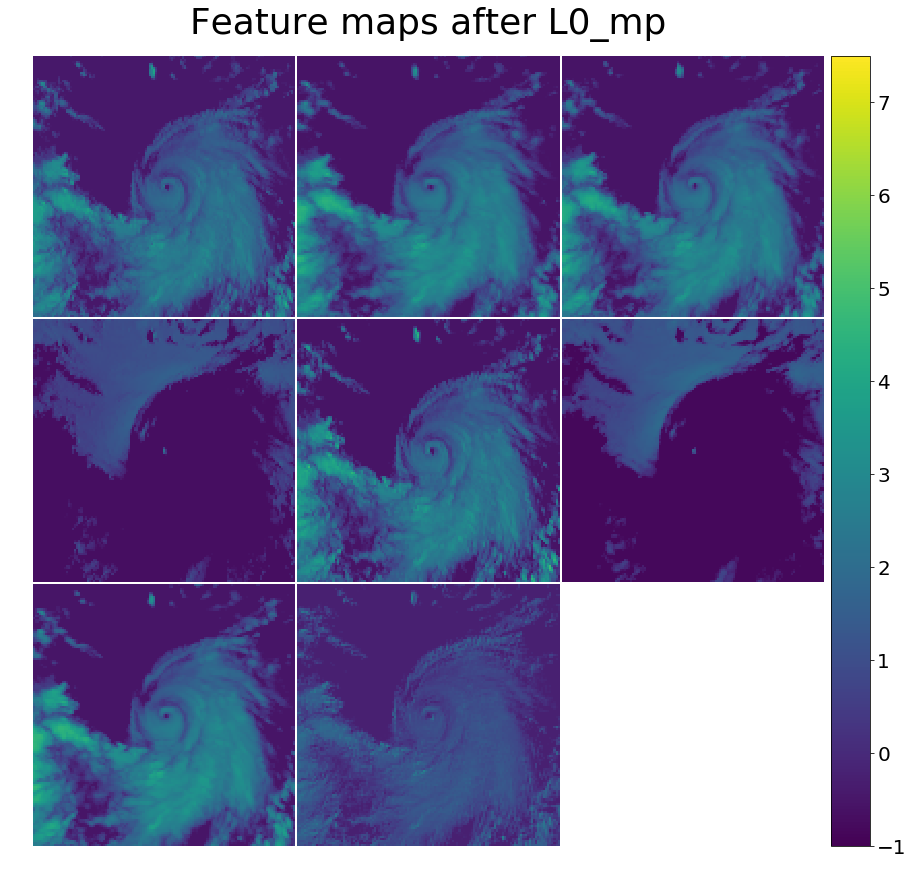

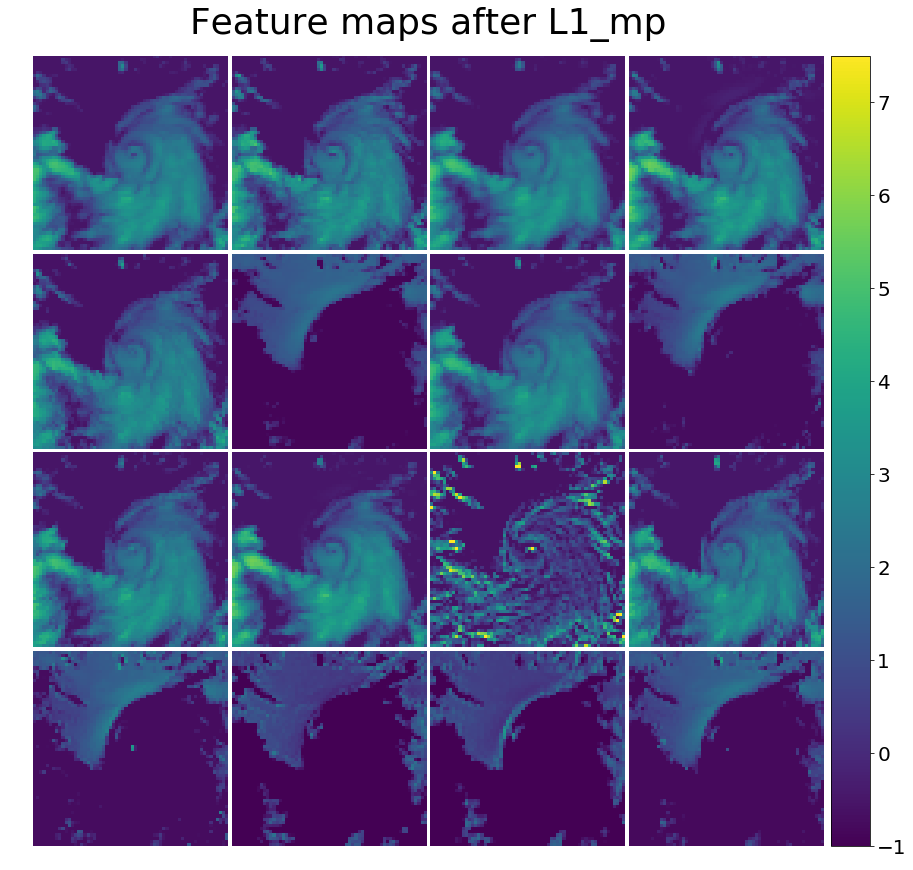

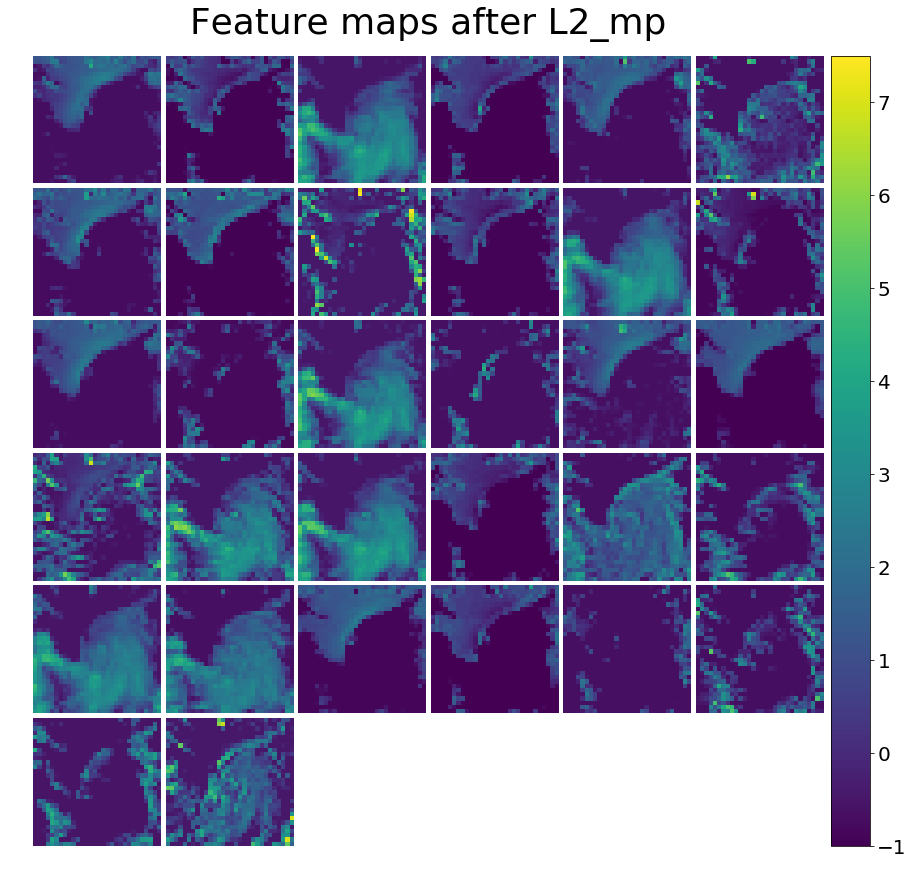

In [20]:
C = get_activations(model, 'max_pooling2d_1', X_tc)
plt.figure(figsize=(15, 15))
plt.title('Feature maps after L0_mp', fontsize=36, y=1.02)
plt.axis('off')
nice_imshow(plt.gca(), make_mosaic(C, 3, 3), vmin=-1, vmax=7.5, colorbar=True, barsize=20)
# plt.savefig('../_assets/example_activation_l0_tc.eps', format='eps')

C = get_activations(model, 'max_pooling2d_2', X_tc)
plt.figure(figsize=(15, 15))
plt.title('Feature maps after L1_mp', fontsize=36, y=1.02)
plt.axis('off')
nice_imshow(plt.gca(), make_mosaic(C, 4, 4), vmin=-1, vmax=7.5, colorbar=True, barsize=20)
# plt.savefig('../_assets/example_activation_l1_tc.eps', format='eps')

C = get_activations(model, 'max_pooling2d_3', X_tc)
plt.figure(figsize=(15, 15))
plt.title('Feature maps after L2_mp', fontsize=36, y=1.02)
plt.axis('off')
nice_imshow(plt.gca(), make_mosaic(C, 6, 6), vmin=-1, vmax=7.5, colorbar=True, barsize=20)
# plt.savefig('../_assets/example_activation_l2_tc.eps', format='eps')

#### xTC

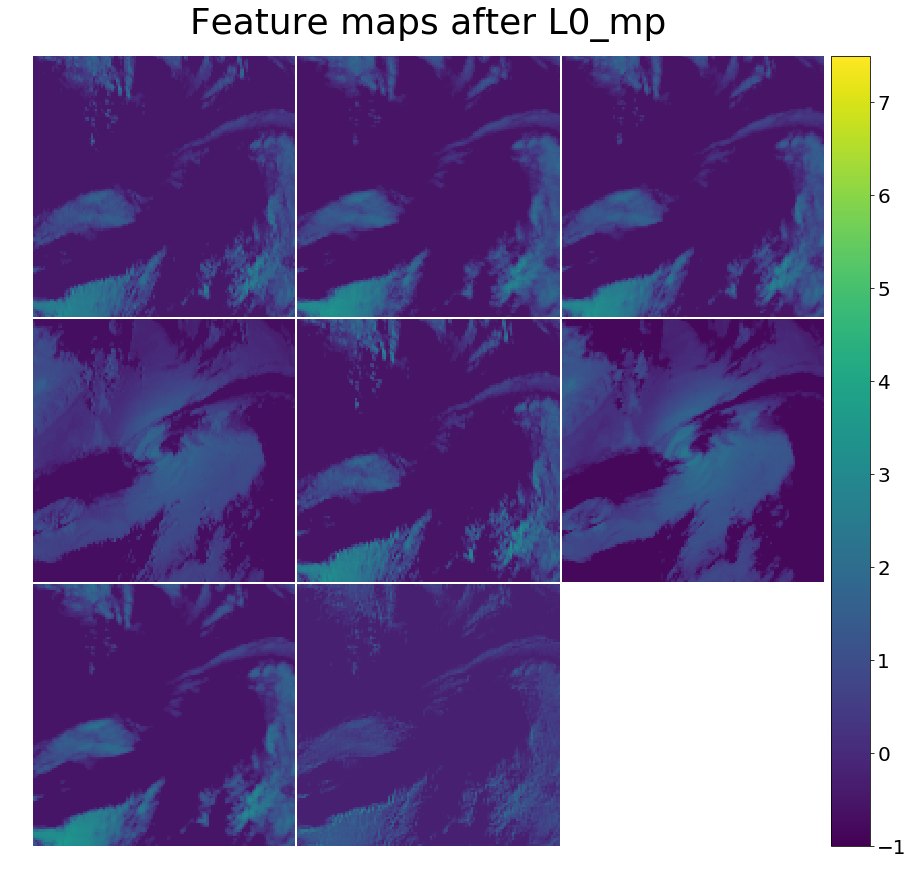

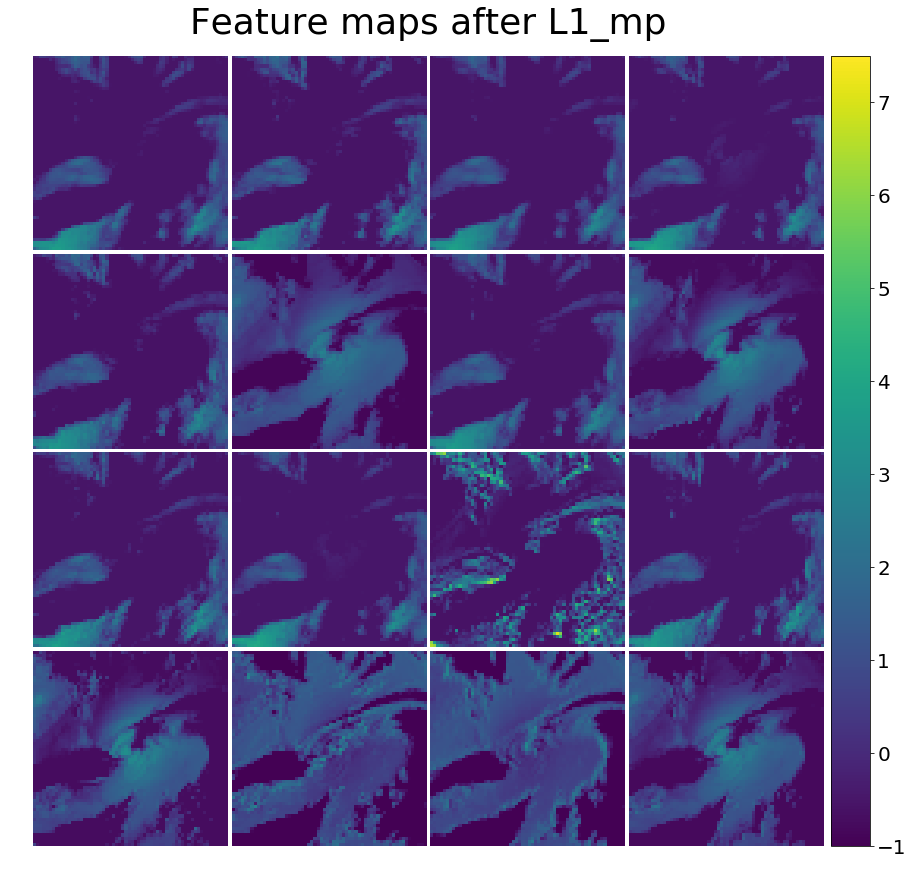

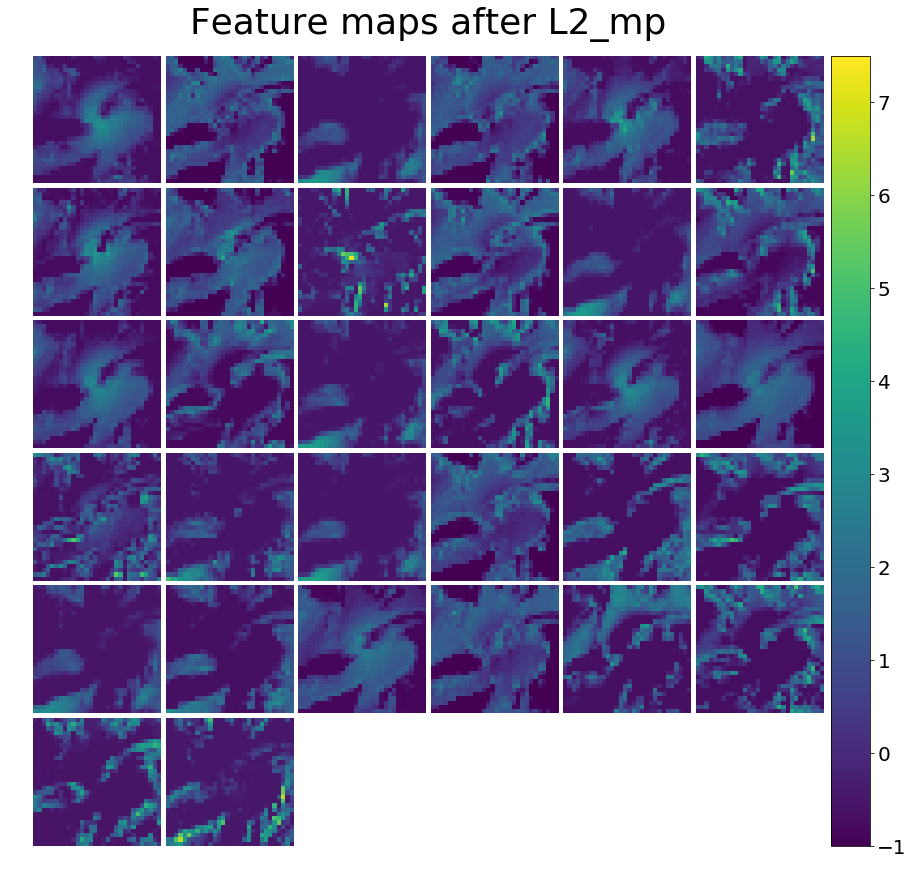

In [21]:
C = get_activations(model, 'max_pooling2d_1', X_xtc)
plt.figure(figsize=(15, 15))
plt.title('Feature maps after L0_mp', fontsize=36, y=1.02)
plt.axis('off')
nice_imshow(plt.gca(), make_mosaic(C, 3, 3), vmin=-1, vmax=7.5, colorbar=True, barsize=20)
# plt.savefig('../_assets/example_activation_l0_tc.eps', format='eps')

C = get_activations(model, 'max_pooling2d_2', X_xtc)
plt.figure(figsize=(15, 15))
plt.title('Feature maps after L1_mp', fontsize=36, y=1.02)
plt.axis('off')
nice_imshow(plt.gca(), make_mosaic(C, 4, 4), vmin=-1, vmax=7.5, colorbar=True, barsize=20)
# plt.savefig('../_assets/example_activation_l1_tc.eps', format='eps')

C = get_activations(model, 'max_pooling2d_3', X_xtc)
plt.figure(figsize=(15, 15))
plt.title('Feature maps after L2_mp', fontsize=36, y=1.02)
plt.axis('off')
nice_imshow(plt.gca(), make_mosaic(C, 6, 6), vmin=-1, vmax=7.5, colorbar=True, barsize=20)
# plt.savefig('../_assets/example_activation_l2_tc.eps', format='eps')

### 2.2 Dense layer
Once the conv layers have been explored, we now proceed to inspect the dense layers. To this end, we will try to see which units are activated in the dense layers.

#### TC

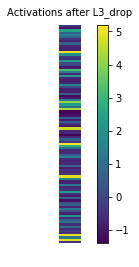

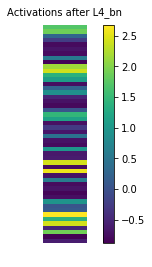

In [22]:
C = get_activations(model, 'dropout_1', X_tc, dense=True, expand=True)
plt.gcf().clear()
im = plt.imshow(C)
plt.colorbar(im)
plt.axis('off')
plt.title('Activations after L3_drop', fontsize=10, y=1.02)
# plt.savefig('../_assets/example_activation_l3_tc.eps', format='eps')
plt.show()

C = get_activations(model, 'batch_normalization_5', X_tc, dense=True, expand=True)
plt.gcf().clear()
im = plt.imshow(C)
plt.axis('off')
plt.colorbar(im)
plt.title('Activations after L4_bn', fontsize=10, y=1.02)
# plt.savefig('../_assets/example_activation_l4_tc.eps', format='eps')
plt.show()

#### xTC

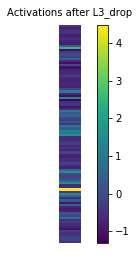

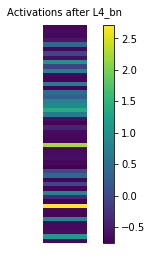

In [23]:
C = get_activations(model, 'dropout_1', X_xtc, dense=True, expand=True)
plt.gcf().clear()
im = plt.imshow(C)
plt.colorbar(im)
plt.axis('off')
plt.title('Activations after L3_drop', fontsize=10, y=1.02)
# plt.savefig('../_assets/example_activation_l3_tc.eps', format='eps')
plt.show()

C = get_activations(model, 'batch_normalization_5', X_xtc, dense=True, expand=True)
plt.gcf().clear()
plt.axis('off')
im = plt.imshow(C)
plt.colorbar(im)
plt.title('Activations after L4_bn', fontsize=10, y=1.02)
# plt.savefig('../_assets/example_activation_l4_tc.eps', format='eps')
plt.show()

## 4. Feature attribution
In this section we will try to find out which regions in the image are the most relevant for the network. First, we define couple of functions that will come in hand. Next, we obtain the feature attribution images for each of the classes (i.e. TC and xTC).

In [64]:
get_patched_images(X_tc, 4, 4, 4).shape

(4096, 256, 256, 1)

### xTC

In [67]:
attribution_image={}
X_patch={}
worst_results_loc={}

patches = [np.min(X_xtc), np.mean(X_xtc), np.max(X_xtc)]

for patch in patches:
    attribution_image[patch], worst_results_loc[patch], X_patch[patch] = get_attribution_image(
        model, X_xtc, patch_size=40, stride=4, patch=patch
    )

Worst result: 0.0314599
Worst result: 0.951231
Worst result: 0.957335


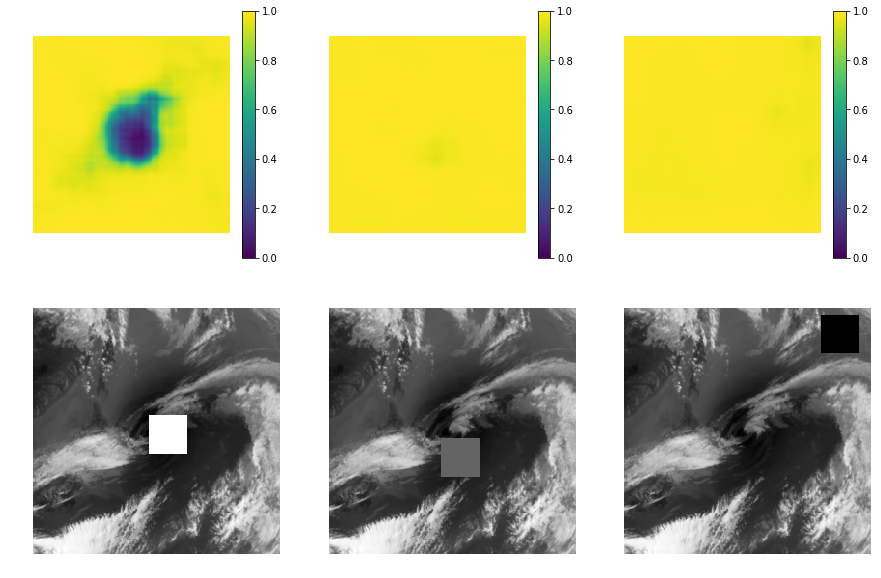

In [68]:
# Plot attribution image
plt.figure(figsize=(15, 10))
idx = 0

count = 1
for patch in patches:
    # Plot attribution image
    plt.subplot(2,3, count)
    im = plt.imshow(attribution_image[patch], vmin=0, vmax=1)
    plt.colorbar(im)
    plt.axis('off')
    # plt.savefig('../_assets/attribution_img_tcxtc_xtc_map'+str(count)+'.eps', format='eps')
    
    # Plot image with patch for worst case
    plt.subplot(2, 3, count+3)
    plt.imshow(X_patch[patch][worst_results_loc[patch][idx],:,:,0], cmap="Greys")
    plt.axis('off')
    # plt.savefig('../_assets/attribution_img_tcxtc_xtc_img'+str(count)+'.eps', format='eps')
    
    count += 1
    print("Worst result:", np.min(attribution_image[patch]))
    
plt.show()

### TC

In [70]:
# Reshape to obtain image
attribution_image={}
X_patch={}
worst_results_loc={}

patches = [np.min(X_tc), np.mean(X_tc), np.max(X_tc)]

for patch in patches:
    attribution_image[patch], worst_results_loc[patch], X_patch[patch] = get_attribution_image(
        model, X_tc, patch_size=120, stride=4, patch=patch
    )

Worst result: 0.000703049
Worst result: 0.99428
Worst result: 0.481119


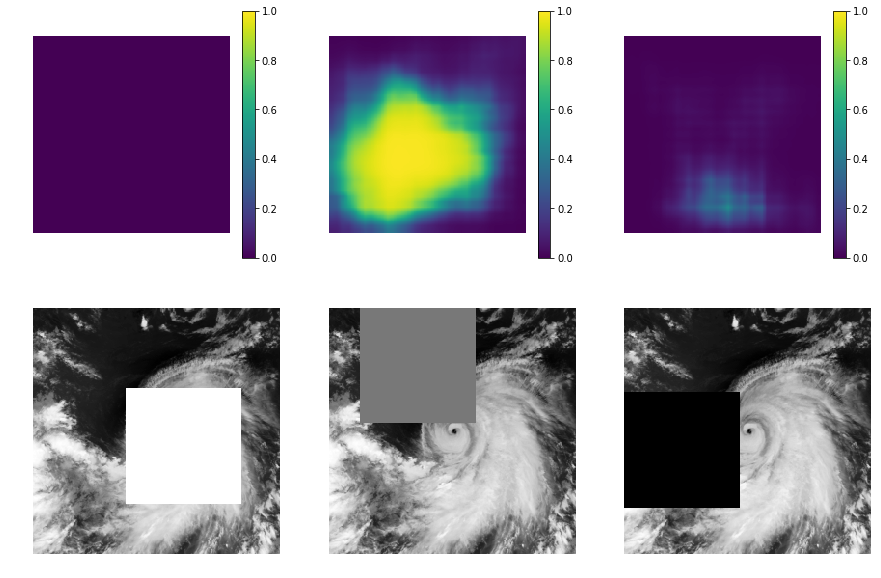

In [71]:
# Plot attribution image
plt.figure(figsize=(15, 10))
idx = 0

count = 1
for patch in patches:
    # Plot attribution image
    plt.subplot(2,3, count)
    #plt.gcf().clear()
    im = plt.imshow(attribution_image[patch], vmin=0, vmax=1)
    plt.colorbar(im)
    plt.axis('off')
    # plt.savefig('../_assets/attribution_img_tcxtc_xtc_map'+str(count)+'.eps', format='eps')
    
    # Plot image with patch for worst case
    plt.subplot(2, 3, count+3)
    plt.imshow(X_patch[patch][worst_results_loc[patch][idx],:,:,0], cmap="Greys")
    plt.axis('off')
    # plt.savefig('../_assets/attribution_img_tcxtc_xtc_img'+str(count)+'.eps', format='eps')
    
    count += 1
    print("Worst result:", np.max(attribution_image[patch]))
    
plt.show()